In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import *
import seaborn as sns

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
print(data.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
print(data.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


In [8]:
print(data.shape)

(284807, 31)


In [9]:
data_new = data.drop(['Time'], axis=1)

In [10]:
print(data_new)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.01830

In [11]:
print(data_new.values)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ... -2.10530535e-02
   1.49620000e+02  0.00000000e+00]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ...  1.47241692e-02
   2.69000000e+00  0.00000000e+00]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.97518406e-02
   3.78660000e+02  0.00000000e+00]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ... -2.65608286e-02
   6.78800000e+01  0.00000000e+00]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.04532821e-01
   1.00000000e+01  0.00000000e+00]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ...  1.36489143e-02
   2.17000000e+02  0.00000000e+00]]


<AxesSubplot:>

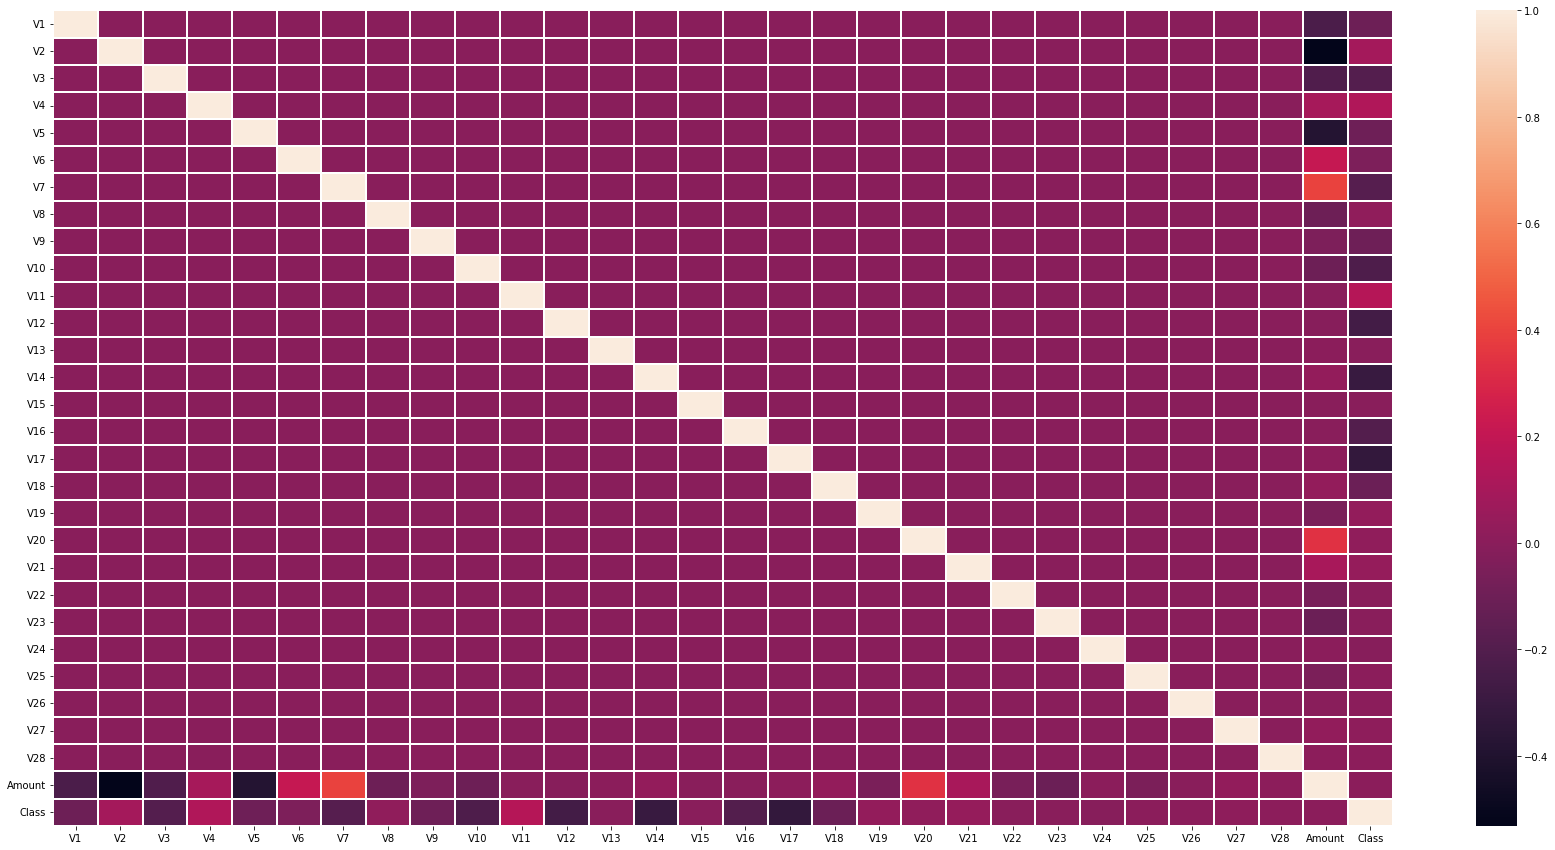

In [75]:
ax=plt.figure(figsize=(30,15))
data_corr=data_new.corr()
sns.heatmap(data_corr,linewidths=1,linecolor='white')

In [12]:
X = data_new.iloc[:,0:29]
y = data_new['Class']

In [13]:
print(X.head(5))

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.0

In [14]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [15]:
print(X.values)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, shuffle=True)

In [48]:
lr_model.probability=True
svm_model.probability=True
nb_model.probability=True

In [49]:
lr_model = LogisticRegression()

In [50]:
lr_model.fit(X_train, y_train)

C:\Users\Gaurav Prasanna\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = lr_model.predict(X_test)

In [52]:
print(accuracy_score(y_pred, y_test))

0.9991397773954567


In [53]:
print('Classification Report for Logistic Regression:')
print(classification_report(y_pred, y_test))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56888
           1       0.62      0.88      0.73        74

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [54]:
conf_mat = confusion_matrix(y_pred, y_test)

In [55]:
print(conf_mat)

[[56848    40]
 [    9    65]]


<AxesSubplot:>

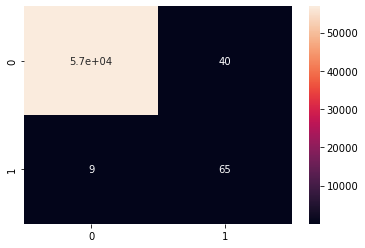

In [56]:
sns.heatmap(conf_mat, annot=True)

In [57]:
svm_model = SVC(kernel='rbf')

In [58]:
svm_model.fit(X_train, y_train)

SVC()

In [59]:
svm_preds = svm_model.predict(X_test)

In [60]:
print(accuracy_score(svm_preds, y_test))

0.9986657771847899


In [61]:
print('Classification Report for Support Vector Machine:')
print(classification_report(svm_preds, y_test))

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56919
           1       0.34      0.84      0.49        43

    accuracy                           1.00     56962
   macro avg       0.67      0.92      0.74     56962
weighted avg       1.00      1.00      1.00     56962



In [62]:
conf_mat_svm = confusion_matrix(svm_preds, y_test)

In [63]:
print(conf_mat_svm)

[[56850    69]
 [    7    36]]


<AxesSubplot:>

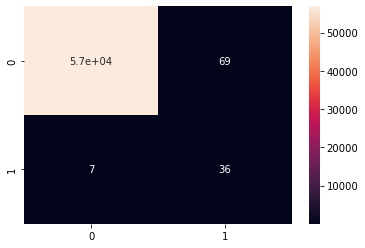

In [64]:
sns.heatmap(conf_mat_svm, annot=True)

In [65]:
nb_model = GaussianNB()

In [66]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [67]:
nb_preds = nb_model.predict(X_test)

In [68]:
print(accuracy_score(nb_preds, y_test))

0.9777746567887363


In [69]:
print('Classification Report for Naive Bayes:')
print(classification_report(nb_preds, y_test))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55633
           1       0.80      0.06      0.12      1329

    accuracy                           0.98     56962
   macro avg       0.89      0.53      0.55     56962
weighted avg       0.97      0.98      0.97     56962



In [70]:
conf_mat_nb = confusion_matrix(nb_preds, y_test)

In [71]:
print(conf_mat_nb)

[[55612    21]
 [ 1245    84]]


<AxesSubplot:>

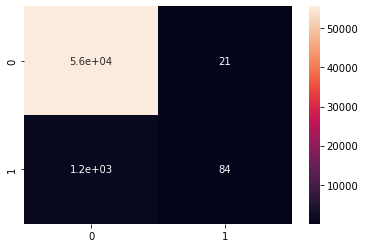

In [72]:
sns.heatmap(conf_mat_nb, annot=True)

In [47]:
y_pred_prob1 = lr_model.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = svm_model.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = nb_model.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Support Vector Machine")
plt.plot(fpr3, tpr3, label= "Naive Bayes classifier")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

NotFittedError: predict_proba is not available when fitted with probability=False